In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mlxtend.preprocessing import minmax_scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [151]:
data_frame = pd.read_csv('adult.csv')
data_frame.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [152]:
#Посмотрим первичную информацию о данных.
data_frame.shape

(48842, 15)

In [153]:
data_frame.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [154]:
data_frame.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [155]:
data_frame.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
data_frame.median()

age                    37.0
fnlwgt             178144.5
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
dtype: float64

In [157]:
#Проверим данные на  пропуски.
#В таблице нет Nan, но есть символы '?', заменим их на Nan
data_frame.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [158]:
data_frame['workclass'] = data_frame['workclass'].replace('?', np.nan)
data_frame['occupation'] = data_frame['occupation'].replace('?', np.nan)
data_frame['native-country'] = data_frame['native-country'].replace('?', np.nan)


In [159]:
data_frame.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

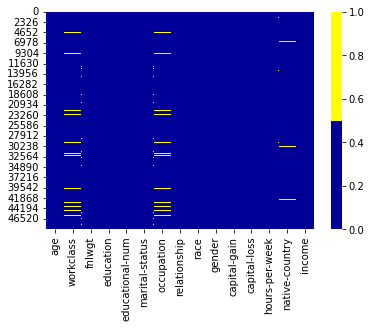

In [160]:
# Тепловая карта для обнаружения пропусков
colors = ['#000099','#ffff00']
sns.heatmap(data_frame[data_frame.columns[:30]].isnull(),cmap = sns.color_palette(colors))

In [161]:
# Процентный список
for col in data_frame.columns:
  pct_miss = np.mean(data_frame[col].isna())
  print('{} - {}%'.format(col, round(pct_miss * 100)))

age - 0%
workclass - 6%
fnlwgt - 0%
education - 0%
educational-num - 0%
marital-status - 0%
occupation - 6%
relationship - 0%
race - 0%
gender - 0%
capital-gain - 0%
capital-loss - 0%
hours-per-week - 0%
native-country - 2%
income - 0%


In [162]:
# По тепловой карте видно, что в столбцах 'workclass' и 'occupation' пропуски совпадают.
# Проверим это.
np.all(data_frame['workclass'].isna().index == data_frame['occupation'].isna().index)

True

In [163]:
# Можно выкинуть эти данные и потерять не более 8%.
clean_df = data_frame.dropna(subset=['workclass', 'occupation', 'native-country'])
print('Потери составят: {}%'.format(round((1. - clean_df.shape[0] / data_frame.shape[0]) * 100)))
data_frame = clean_df



Потери составят: 7%


In [164]:
# Проверим на дубликаты
is_dup = data_frame.duplicated().any()
if is_dup:
  print("Есть дубликаты")
else:
  print("Дубликатов нет")

Есть дубликаты


In [165]:
# Избавимся от дубликатов
data_frame = data_frame.drop_duplicates()

# Визуализация

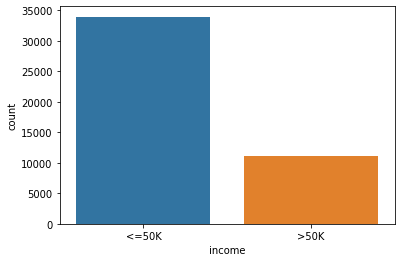

In [166]:
# Доход ниже 50 тысяч встречается намного чаще.
sns.countplot(x='income', data=data_frame)

In [167]:
# Целевым полем является достаток, однако это поле типа string. Преобразуем его.

data_frame['income']=data_frame['income'].map({'<=50K':0,'>50K':1})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
women_df = data_frame[data_frame['gender']=='Female']
men_df = data_frame[data_frame['gender']=='Male']

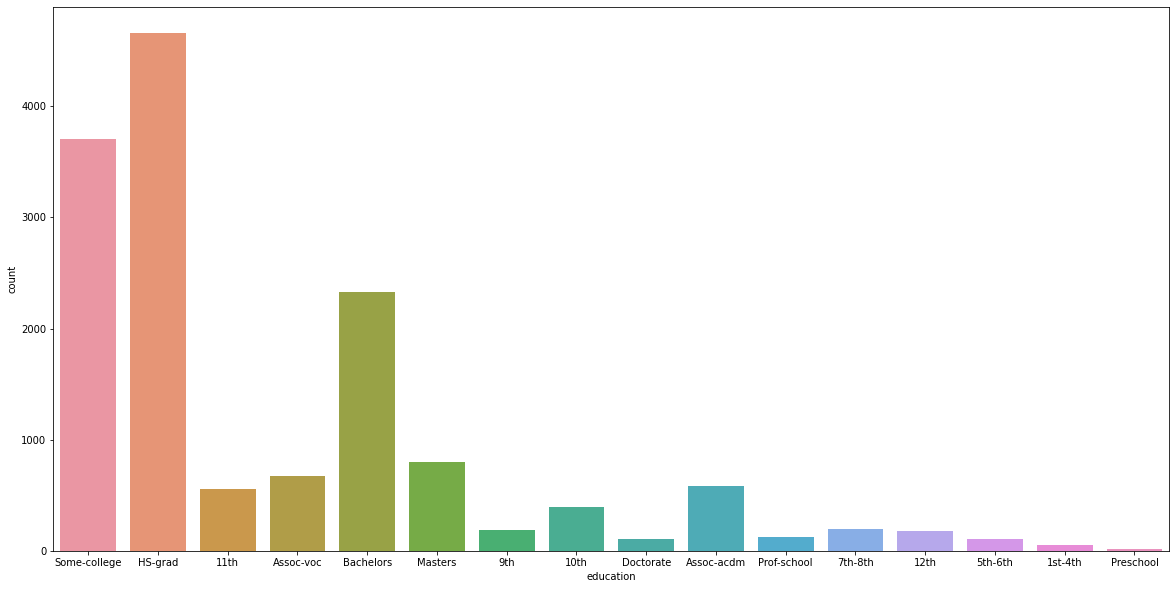

In [169]:
#Распределение образования женщин

fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.countplot(x='education', data=women_df, ax=ax)





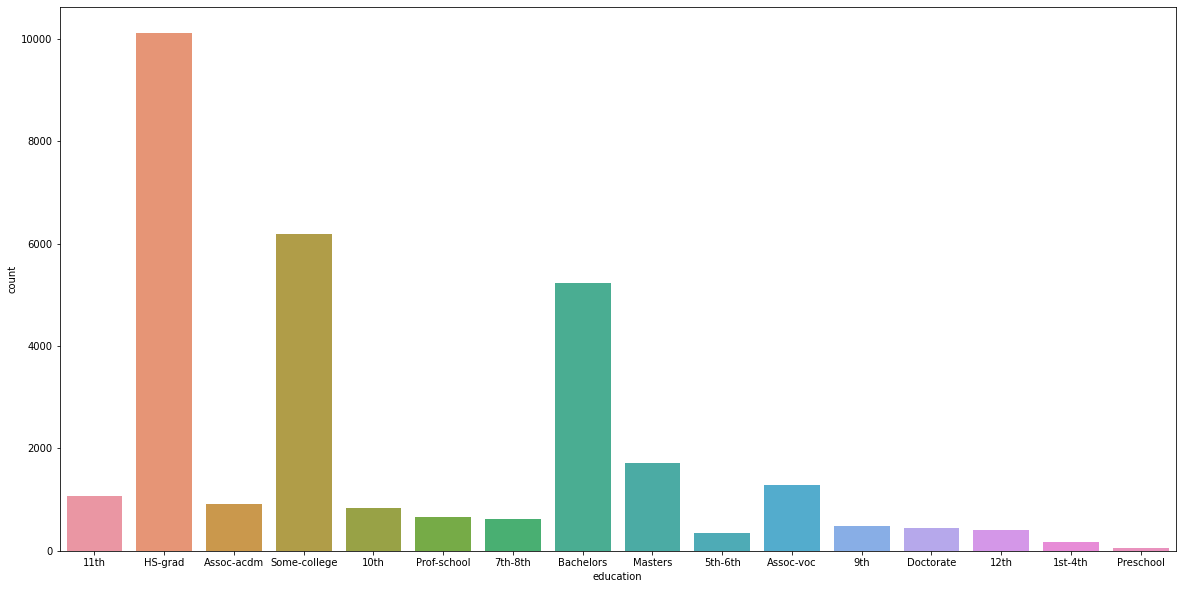

In [170]:
# Распределение образования мужчин
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.countplot(x='education', data=men_df, ax=ax)


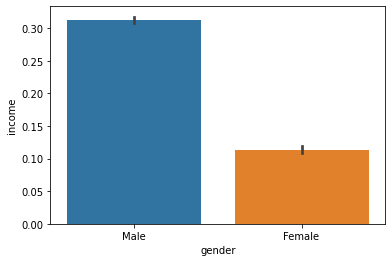

In [171]:
# У мужчин в среденем доход выше, чем у женщин
sns.barplot(x='gender', y='income', data=data_frame)

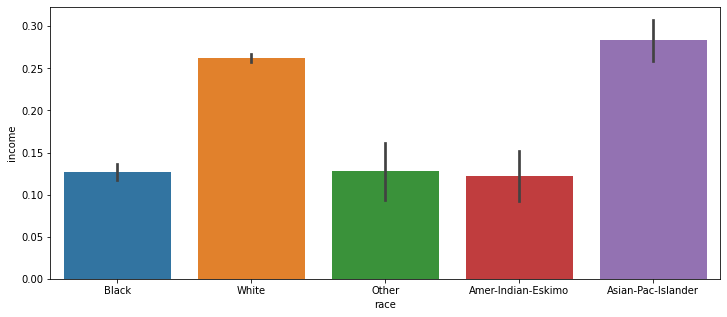

In [172]:
# Вероятность дохода свыше 50 тысяч по рассам.
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

sns.barplot(x='race', y='income', data=data_frame, ax=ax)

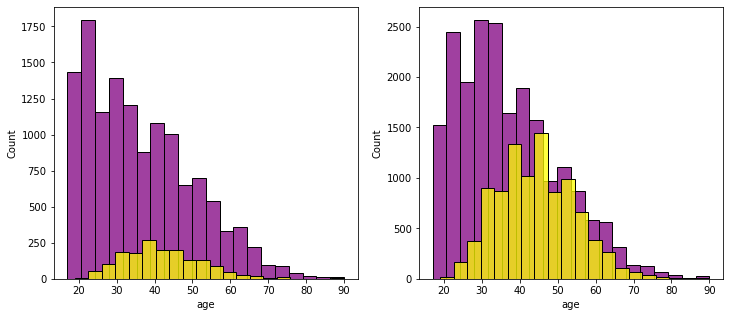

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))




sns.histplot(women_df[women_df['income']==0]['age'], bins=20, ax=axs[0],kde=False,  color='purple')
sns.histplot(women_df[women_df['income']==1]['age'], bins=20, ax=axs[0],kde=False, color='yellow')

ax.set_title('Female')

sns.histplot(men_df[men_df['income']==0]['age'], bins=20, ax=axs[1],kde=False, color='purple')
sns.histplot(men_df[men_df['income']==1]['age'], bins=20, ax=axs[1],kde=False, color='yellow')

ax.set_title('Male')
plt.show()


In [174]:
# Избавимся от ненужных данных.
#1. education. Есть замена - education.num
#2. fnlwgt(final weight) - показатель не стандартизирован для разных штатов.
#3. relationship - объединяет в себе признаки 'marital-status' и 'gender'.
#4. Native-country - в основном состоит из значений 'US'.

data_frame = data_frame.drop(['education'], axis=1)
data_frame = data_frame.drop(['fnlwgt'], axis=1)
data_frame = data_frame.drop(['relationship'], axis=1)
data_frame = data_frame.drop(['native-country'], axis=1)
data_frame = data_frame.drop(['occupation'], axis=1)
data_frame.head()

,age,workclass,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Black,Male,0,0,40,0
1,38,Private,9,Married-civ-spouse,White,Male,0,0,50,0
2,28,Local-gov,12,Married-civ-spouse,White,Male,0,0,40,1
3,44,Private,10,Married-civ-spouse,Black,Male,7688,0,40,1
5,34,Private,6,Never-married,White,Male,0,0,30,0


In [175]:
# Для построения метрических моделей все признаки должны быть числовыми.

race = {'Black' : 0, 'White' : 1, 'Amer-Indian-Eskimo' : 2, 'Asian-Pac-Islander' : 3, 'Other' : 4}
data_frame = data_frame.replace({'race' : race})

workclass = {'Private' : 0, 'Local-gov' : 1, 'Self-emp-not-inc' : 2, 'Federal-gov' : 3, 'State-gov' : 4, 'Self-emp-inc' : 5, 'Without-pay' : 6}
data_frame = data_frame.replace({'workclass' : workclass})

gender = {'Male' : 0, 'Female' : 1}
data_frame = data_frame.replace({'gender' : gender})


In [176]:
# Семейное положение можно разбить на 2 класса.
#  Not married = 0, Married = 1
ms = {'Never-married' : 0, 'Married-civ-spouse' : 1, 'Widowed' : 0, 'Separated' : 0, 'Divorced' : 0,
      'Married-spouse-absent' : 1, 'Married-AF-spouse' : 1}

data_frame = data_frame.replace({'marital-status' : ms})


In [177]:

#data_frame.drop(data_frame.tail(10000).index, inplace=True)
#data_frame.shape

In [178]:


data_frame.head()

,age,workclass,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,0,7,0,0,0,0,0,40,0
1,38,0,9,1,1,0,0,0,50,0
2,28,1,12,1,1,0,0,0,40,1
3,44,0,10,1,0,0,7688,0,40,1
5,34,0,6,0,1,0,0,0,30,0


In [179]:
# Формируем тренировачные и тестовые данные

X = data_frame.drop(columns=['income'])
y = data_frame['income']

In [180]:
# Разобьем нашу выборку на обучающую и тестовую.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN


In [181]:
class SimpleKNNClassifier:
  def __init__(self, neighbours = 5):
    self.neighbours = neighbours

  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    self.number_of_labels = len(np.unique(labels))

  def predict(self, item):
    distances = np.sum((item[np.newaxis, :] - self.data[:]) ** 2, axis=1)
    nearest = np.argsort(distances)
    scores = np.zeros(self.number_of_labels)
    for i in range(self.neighbours):
        if distances[nearest[i]] == 0:
          return self.labels[nearest[i]]
        else:
          weight = 1 / distances[nearest[i]]
        scores[self.labels[nearest[i]]] += weight     
    return scores.argmax()

In [182]:
# Сравним точность предсказаний в зависимости от выбора количества соседей.
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1, 10):
  results = []
  x = SimpleKNNClassifier(i)
  x.fit(X_train.to_numpy(), Y_train.to_numpy())
  for j in range(len(Y_test)):
    results.append(x.predict(X_test.iloc[j, :].to_numpy()))
  counter = 0
  for j in range(len(Y_test)):
    if results[j] == Y_test.iloc[j]:
        counter += 1
  accuracy.append(accuracy_score(Y_test, results))

In [183]:
maxAccurMy = max(accuracy)


Text(0, 0.5, 'Accuracy')

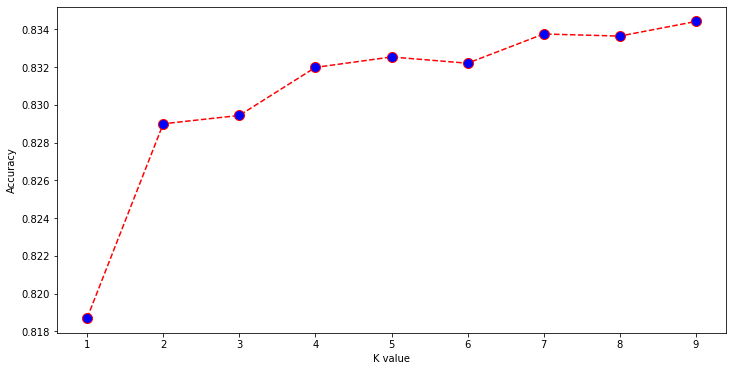

In [184]:
# График зависимости точности предсказаний от числа соседей.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [185]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1, 10):
  model = KNeighborsClassifier(n_neighbors=i, weights='distance')
  model.fit(X_train, Y_train)
  accuracy.append(model.score(X_test, Y_test))


In [186]:
maxAccurSkl = max(accuracy)

Text(0, 0.5, 'Accuracy')

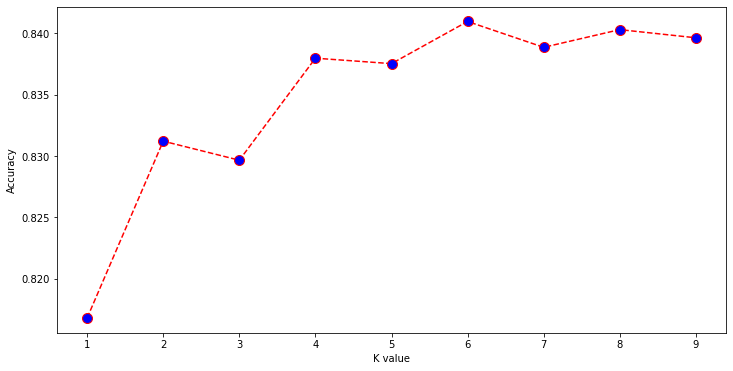

In [187]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [188]:
print("Max accuracy with my knn", maxAccurMy)
print("Max accuracy with skl knn", maxAccurSkl)

Max accuracy with my knn 0.8344216934144991
Max accuracy with skl knn 0.8409518539014942


# Naive Bayes classifier


In [189]:
from math import exp, pi, sqrt, log

class NaiveBayesClassifier:
    def __init__(self):
        pass

    def get_probabilities(self, class_idx: int, x: np.array) -> np.array:
        mean = self.mean_cond_class[class_idx]
        var = self.var_cond_class[class_idx]
        exponent = np.exp((-1/2) * ((x-mean)**2) / (2 * var))
        probabilities = exponent / np.sqrt(2 * np.pi * var)
        return probabilities
    def get_posterior(self, x: np.array) -> int:
        posteriors = []
        for class_idx in range(self.num_of_classes):
            prior = np.log(self.prior[class_idx])
            conditional = np.sum(np.log(self.get_probabilities(class_idx, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def fit(self, X_train, Y_train):
        self.classes = np.unique(Y_test)
        self.num_of_classes = len(self.classes)
        self.mean_cond_class = X_train.groupby(Y_train).apply(np.mean).to_numpy()
        self.var_cond_class = X_train.groupby(Y_train).apply(np.var).to_numpy()


        self.prior = X_train.groupby(Y_train).apply(lambda col: len(col))
        self.prior = np.array(self.prior / len(Y_train))
        
    def predict(self, X_test):
        Y_pred = [self.get_posterior(f) for f in X_test.to_numpy()]
        return Y_pred
    
    def accuracy_score(self, Y_test, Y_pred):
	    return sum(Y_pred == Y_test) / len(Y_test)

In [190]:
nbc = NaiveBayesClassifier()
nbc.fit(X_train, Y_train)
Y_pred = nbc.predict(X_test)
print(f'Accuracy of custom Naive Bayes: {nbc.accuracy_score(Y_test, Y_pred)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Accuracy of custom Naive Bayes: 0.8057553956834532


In [191]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test)  
print(f'Accuracy of sklearn Naive Bayes: {gaussian.score(X_train, Y_train)}')

Accuracy of sklearn Naive Bayes: 0.7967349197565025
